# 합성곱 연산

In [1]:
y = [3, 4, 1, 5, 7, 9, 6, 2]

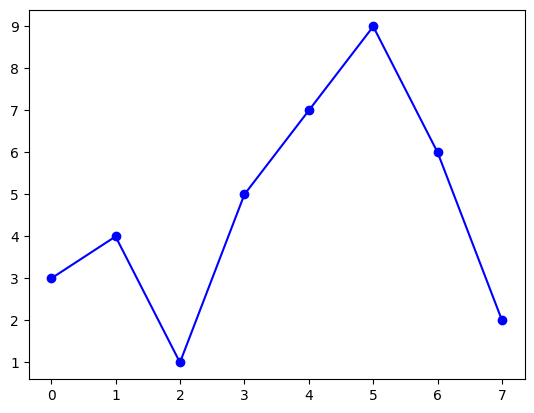

In [2]:
import matplotlib.pyplot as plt
plt.plot(y, 'bo-')

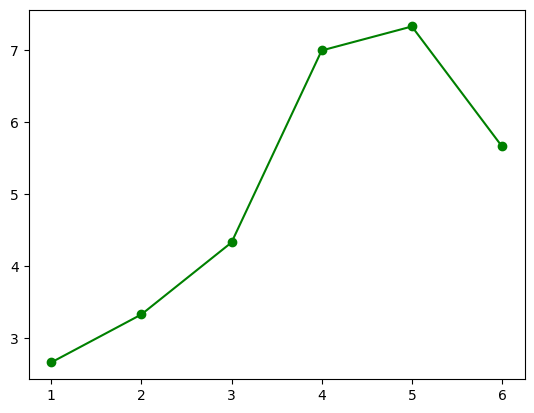

In [3]:
ma_y = [None, 8/3, 10/3, 13/3, 21/3, 22/3, 17/3, None]
plt.plot(ma_y, 'go-')

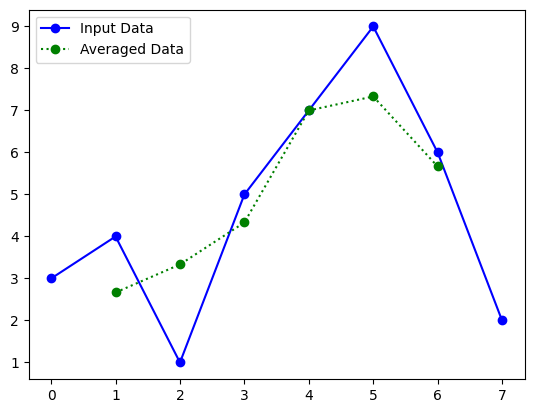

In [4]:
data = [3, 4, 1, 5, 7, 9, 6, 2]
mavg = [None, 8/3, 10/3, 13/3, 21/3, 22/3, 17/3, None]

import matplotlib.pyplot as plt

plt.plot(data, 'bo-', label="Input Data")
plt.plot(mavg, 'go:', label="Averaged Data")
plt.legend()

In [5]:
h = [1/4, 1/2, 1/4]

In [6]:
w_mavg = [None]
for i in range(1, len(data)-1) :
    w_mavg.append(h[0]*data[i-1] + h[1]*data[i] + h[2]*data[i+1])

In [7]:
w_mavg

[None, 3.0, 2.75, 4.5, 7.0, 7.75, 5.75]

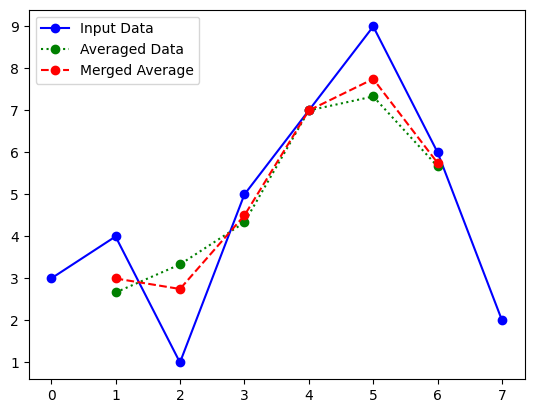

In [8]:
import matplotlib.pyplot as plt
plt.plot(data, 'bo-', label='Input Data')
plt.plot(mavg, 'go:', label='Averaged Data')
plt.plot(w_mavg, 'ro--', label='Merged Average')
plt.legend()

# 합성곱의 활용

In [9]:
data = [0,0,0,10,10,10,10,10,10,10,0,0,0]
h = [-1, 2, -1]

In [10]:
w_mavg = [0]
for i in range(1, len(data)-1) :
    w_mavg.append(h[0]*data[i-1] + h[1]*data[i] + h[2]*data[i+1])

In [11]:
import numpy as np
np.abs(w_mavg) > 5

array([False, False,  True,  True, False, False, False, False, False,
        True,  True, False])

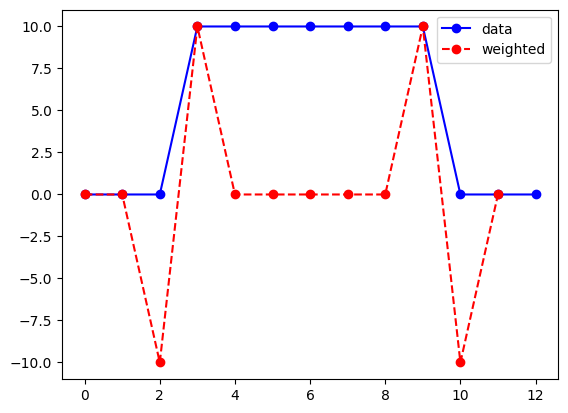

In [12]:
plt.plot(data, 'bo-', label="data")
plt.plot(w_mavg, 'ro--', label="weighted")
plt.legend()

# 합성곱 함수 구현하기

In [13]:
import numpy as np

def Conv2D(img, kernel=None, padding="valid"):
    if kernel is not None :
        h, w = img.shape[0:2]
        kh, kw = kernel.shape
        sy, sx = int(kh/2), int(kw/2)
        if padding=="same": 
            new_shape = (h+sy, w+sx)
            img_out = np.zeros(new_shape, dtype=np.uint8)
        elif padding=="valid":
            img_out = np.zeros(img.shape, dtype=np.uint8)

        height, width = img_out.shape
        for y in range(sy, height-2*sy):
            for x in range(sx, width-2*sx):
                roi = img[y-sy:y+sy+1, x-sx:x+sx+1]
                filtered = roi * kernel
                conv_value = np.abs(np.sum(filtered))
                img_out[y, x] = np.uint8(conv_value)
                
        return img_out[sy:-sy, sx:-sx]
    else:
        print("Kernel array not found!")

In [14]:
import cv2  # pip install opencv-python 

img = cv2.imread("house.jpg", cv2.IMREAD_GRAYSCALE)
kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = Conv2D(img, kernel=kernel, padding="same")
cv2.imshow("House", img)
cv2.imshow("Conv2D", output)
cv2.waitKey()
cv2.destroyAllWindows()

# 맥스 풀링

In [15]:
import numpy as np

def maxpool2d(img):
    height, width = img.shape
    img_ = np.zeros((int(height/2), int(width/2)), dtype=np.uint8)
    for y in range(int(height/2)):
        for x in range(int(width/2)):
            try:
                img_[y, x] = np.max(img[2*y:2*y+2, 2*x:2*x+2])
            except:
                pass
    return img_

In [16]:
import cv2

img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow("Lena", img)
kernel = np.array([[0,0,0], [0,1,-1], [0,0,0]])
edge = cv2.filter2D(img, -1, kernel)
cv2.imshow("Egde", edge)
cv2.imshow("resize", cv2.resize(img, dsize=(0,0), fx=0.5, fy=0.5))
cv2.imshow("Max Pooling", maxpool2d(img))
cv2.imshow("edge resize", cv2.resize(edge, dsize=(0,0), fx=0.5, fy=0.5))
cv2.imshow("edged max pool", maxpool2d(edge))

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
import matplotlib.pyplot as plt

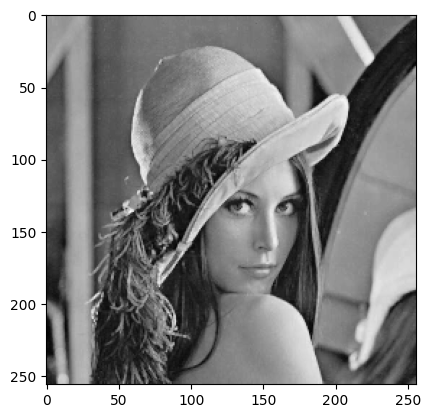

In [18]:
plt.imshow(maxpool2d(img), cmap="gray")
plt.show()

In [19]:
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu',),
    layers.MaxPooling2D(pool_size=(2, 2))
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)